<a href="https://colab.research.google.com/github/lorenafc/MGI/blob/main/small_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalando o pacote mapclassify versão 2.4.0
!pip install mapclassify==2.4.0 -q
!pip install contextily -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 60.0 MB/s eta 0:00:00


In [ ]:
#import libraries
import pandas as pd
import geopandas as gpd
import folium
from folium import Marker
import matplotlib.pyplot as plt
import contextily as cx

In [ ]:
# Vamos importar a contextily e utilizaar seus mapas bases


# Mostrando na tela as opções e nomes dos provedores de mapas base
print(cx.providers.keys())
print(cx.providers.values())

# mais detalhes sobre provedores https://contextily.readthedocs.io/en/latest/providers_deepdive.html

dict_keys(['OpenStreetMap', 'MapTilesAPI', 'OpenSeaMap', 'OPNVKarte', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Stadia', 'Thunderforest', 'BaseMapDE', 'CyclOSM', 'Jawg', 'MapBox', 'MapTiler', 'TomTom', 'Esri', 'OpenWeatherMap', 'HERE', 'HEREv3', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'GeoportailFrance', 'OneMapSG', 'USGS', 'WaymarkedTrails', 'OpenAIP', 'OpenSnowMap', 'AzureMaps', 'SwissFederalGeoportal', 'TopPlusOpen', 'Gaode', 'Strava', 'OrdnanceSurvey'])
dict_values([{'Mapnik': {'url': 'https://tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors', 'attribution': '(C) OpenStreetMap contributors', 'name': 'OpenStreetMap.Mapnik'}, 'DE': {'url': 'https://tile.openstreetmap.de/{z}/{x}/{y}.png', 'max_zoom': 18, 'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStree

In [3]:
# upload the file from your computer
from google.colab import files
uploaded=files.upload()

Saving small_cities_geocoded.xlsx to small_cities_geocoded (2).xlsx


In [4]:
# Assuming the uploaded file is named 'additional_authors.xlsx'
file_name = 'small_cities_geocoded.xlsx'

# Read the Excel file
authors_small_cities = pd.read_excel(file_name, engine='openpyxl')

In [ ]:
authors_small_cities.head()

,Unnamed: 0,starturl,birthyear,deathyear,nameandbirthdeathyear,georeferenceurl,born,bornlocation,death,deathlocation,active,activelocation,bornlocation_geo
0,0,http://viaf.org/viaf/81048146,1570.0,1634.0,"Carneiro, Tomé Tavares 1570-1634",viafprocessedfile,,,NaN,NaN,Rio Tinto,Rio Tinto,NaN
1,1,http://viaf.org/viaf/180581759,NaN,1775.0,"Kolíček, Caesarij, -1775",viafprocessedfile,,,Cieszin,Cieszin,NaN,NaN,NaN
2,2,http://viaf.org/viaf/100161519,NaN,1570.0,"Hertel, Jakob 15..?-1570",http://catalogue.bnf.fr/ark:/12148/cb15011774s,(Chur,(Chur,NaN,NaN,NaN,NaN,"(46.854747, 9.5264904)"
3,3,http://viaf.org/viaf/169350346,1699.0,1770.0,"Ferro Caaveyro, Lucas Antonio ca. 1699-1770",www.wikidata.org/wiki/Q3393623#sitelinks-wikip...,A Capela,A Capela,NaN,NaN,NaN,NaN,"(43.442067699999996, -8.043400479082187)"
4,4,http://viaf.org/viaf/67541728,1502.0,1600.0,"Aparicio, Sebastián de 1502-1600 Santo",www.wikidata.org/wiki/Q2486114#sitelinks-wikip...,A GudiÃ±a,A Gudiña,Puebla City,Puebla City,NaN,NaN,"(42.0605483, -7.1403516)"


In [ ]:
type(authors_small_cities)

pandas.core.frame.DataFrame

In [27]:
authors_small_cities_copy=authors_small_cities.copy()

In [28]:
authors_no_nan = authors_small_cities_copy.dropna(subset=['bornlocation_geo'])

In [29]:
# source https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html and chatgpt
from shapely.geometry import Point

authors_small_cities_gdf = gpd.GeoDataFrame(authors_no_nan, geometry=[Point(eval(x)) for x in authors_no_nan['bornlocation_geo']], crs="EPSG:4326")

print(authors_small_cities_gdf.head())

   Unnamed: 0                        starturl  birthyear  deathyear  \
2           2  http://viaf.org/viaf/100161519        NaN     1570.0   
3           3  http://viaf.org/viaf/169350346     1699.0     1770.0   
4           4   http://viaf.org/viaf/67541728     1502.0     1600.0   
5           5  http://viaf.org/viaf/121452165     1320.0     1394.0   
6           6   http://viaf.org/viaf/62383957     1538.0     1592.0   

                         nameandbirthdeathyear  \
2                     Hertel, Jakob 15..?-1570   
3  Ferro Caaveyro, Lucas Antonio ca. 1699-1770   
4       Aparicio, Sebastián de 1502-1600 Santo   
5                              Kukullei, Janos   
6                 Bonifacio, Natale, 1538-1592   

                                     georeferenceurl                   born  \
2     http://catalogue.bnf.fr/ark:/12148/cb15011774s                  (Chur   
3  www.wikidata.org/wiki/Q3393623#sitelinks-wikip...               A Capela   
4  www.wikidata.org/wiki/Q2486114#s

In [30]:
authors_small_cities_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
!pip install mplleaflet -q

  Preparing metadata (setup.py) ... done


In [9]:
# Importe as bibliotecas
import geopandas as gpd
import matplotlib.pyplot as plt
import mplleaflet

In [10]:
#MAP SHOPWS NOTHING

# Set the GeoDataFrame CRS to WGS84 (EPSG:4326)
authors_small_cities_gdf.crs = "EPSG:4326"

# Reproject to a projected CRS (here we use EPSG:3857, commonly used by web maps like OpenStreetMap)
authors_small_cities_gdf = authors_small_cities_gdf.to_crs("EPSG:3857")

# Calculate the bounding box of all geometries
bbox = authors_small_cities_gdf.total_bounds
minx, miny, maxx, maxy = bbox

# Calculate the center of the bounding box
center = [(miny + maxy) / 2, (minx + maxx) / 2]

# Initialize the Folium map centered on the calculated center
m = folium.Map(location=center, zoom_start=10)

# Add markers for each point in the GeoDataFrame
for idx, row in authors_small_cities_gdf.iterrows():
    folium.Marker([row['geometry'].y, row['geometry'].x]).add_to(m)

# Display the map
m

In [ ]:

# Crie uma instância de mapa da folium. Defina a centralização inicial do mapa (location), nível de zoom (zoom), visibildiade da escala (control_scale)
m= folium.Map(location=[52.3676, 4.9041], zoom_start=3, control_scale= True, width= "100%", height= "100%")

In [ ]:
m

In [ ]:
# Converta o geodataframe para geojson
authors_born_gjson=folium.features.GeoJson(authors_small_cities_gdf, name="born locations")

In [ ]:
# Crie uma instância do tipo mapa
m= folium.Map(location=[52.3676, 4.9041], tiles="cartodbpositron", zoom_start=3, control_scale=True)

# Adicione os pontos em formato geojson ao mapa
authors_born_gjson.add_to(m)

# Visualize o resultado
m

In [33]:
#chat gpt
#displayed the markers in the wrong place, east africa, indian ocean etc
# from folium.plugins import MarkerCluster


# Reproject to a projected CRS (here we use EPSG:3857, commonly used by web maps like OpenStreetMap)
authors_small_cities_gdf = authors_small_cities_gdf.to_crs("EPSG:3857")

# Convert GeoDataFrame to GeoJSON
authors_born_geojson = authors_small_cities_gdf.to_crs(epsg='4326').to_json()

# Create a Folium map centered on Amsterdam
m = folium.Map(location=[52.3676, 4.9041], tiles="cartodbpositron", zoom_start=3, control_scale=True)

# Add GeoJSON layer to the map with markers
folium.GeoJson(authors_born_geojson,
               name="Born Locations",
               tooltip=folium.GeoJsonTooltip(fields=['bornlocation'], labels=True)).add_to(m)

# Display the map
m

In [31]:

# Create GeoDataFrame with initial CRS set to WGS84 (EPSG:4326)
authors_small_cities_gdf2 = gpd.GeoDataFrame(authors_small_cities_gdf, geometry='geometry')
authors_small_cities_gdf2.crs = "EPSG:4326"

# Display the GeoDataFrame to check for inf values
print(authors_small_cities_gdf2.head())

   Unnamed: 0                        starturl  birthyear  deathyear  \
2           2  http://viaf.org/viaf/100161519        NaN     1570.0   
3           3  http://viaf.org/viaf/169350346     1699.0     1770.0   
4           4   http://viaf.org/viaf/67541728     1502.0     1600.0   
5           5  http://viaf.org/viaf/121452165     1320.0     1394.0   
6           6   http://viaf.org/viaf/62383957     1538.0     1592.0   

                         nameandbirthdeathyear  \
2                     Hertel, Jakob 15..?-1570   
3  Ferro Caaveyro, Lucas Antonio ca. 1699-1770   
4       Aparicio, Sebastián de 1502-1600 Santo   
5                              Kukullei, Janos   
6                 Bonifacio, Natale, 1538-1592   

                                     georeferenceurl                   born  \
2     http://catalogue.bnf.fr/ark:/12148/cb15011774s                  (Chur   
3  www.wikidata.org/wiki/Q3393623#sitelinks-wikip...               A Capela   
4  www.wikidata.org/wiki/Q2486114#s

In [32]:
# Create a Folium map centered on a general location in Europe
m = folium.Map(location=[52.3676, 4.9041], tiles="cartodbpositron", zoom_start=4, control_scale=True)

# Add individual markers
for idx, row in authors_small_cities_gdf.iterrows():
    if row.geometry and row.geometry.is_valid:
        folium.Marker(
            location=[row.geometry.y, row.geometry.x],  # Note: latitude, longitude
            popup=row['bornlocation']
        ).add_to(m)

# Display the map
m

In [15]:
authors_small_cities_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
#HEAT MAP PYGEO

# Obtenha as coordenadas x e y de cada ponto representando um centro esportivo
authors_small_cities_gdf['x'] =authors_small_cities_gdf["geometry"].apply(lambda geom: geom.x)
authors_small_cities_gdf['y'] =authors_small_cities_gdf["geometry"].apply(lambda geom: geom.y)

# Crie uma lista de pares (tuplas) de coordenadas y e x
locations=list(zip(authors_small_cities_gdf["y"], authors_small_cities_gdf["x"]))



In [ ]:
locations

[(inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),
 (inf, inf),

In [ ]:
# Importe o plugin de mapa de calor
from folium.plugins import HeatMap

# Crie uma instância do tipo mapa
m= folium.Map(location=[-23.549865, -46.610668], tiles="stamentoner", zoom_start=10, control_scale=True)

# Adicione o mapa de calor ao mapa base
HeatMap(locations).add_to(m)

# Visualize o resultado
m

/usr/local/lib/python3.10/dist-packages/mapclassify/classifiers.py:507: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _fisher_jenks_means(values, classes=5, sort=True):


TypeError: can't multiply sequence by non-int of type 'float'

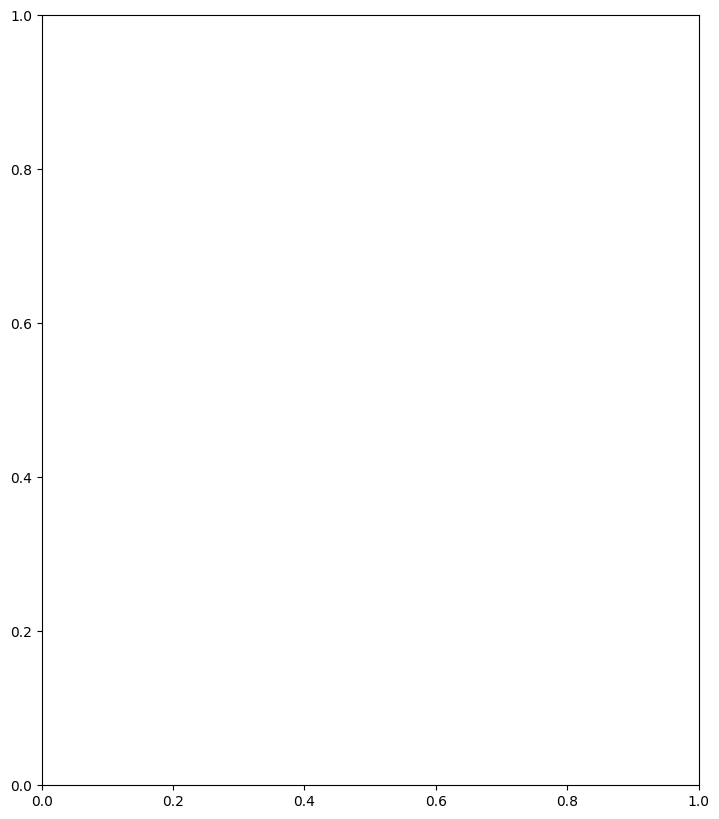

In [ ]:
#source: PyGEO course

# Definindo a figura e o eixo de plotagem. Definindo o tamanho da figura como 10x10 polegadas
fig,eixo=plt.subplots(figsize=(10,10))

# Plotando os dados da coluna  pop usando o mapa de cores seismic. Também usamos quebras naturais para agrupar as classes e
# definimos duas classes (k=2)
authors_small_cities_gdf.plot(ax=eixo, cmap="seismic", column="bornlocation", markersize=200, scheme= "naturalbreaks", k=2, legend=True)

# # Definindo os limites dos eixos x e y dos nossos plots
# eixo.set_xlim(-45.95, -45.86)
# eixo.set_ylim(-23.26,-23.13)

# Definindo um título para a figura
fig.suptitle("Born location")

# Adicionando o mapa base do provedor openstreet maps e definindo o crs como SIRGAS2000(epsg:4674)
cx.add_basemap(ax=eixo, crs="epsg:4326", zoom=13, source=cx.providers.OpenStreetMap.Mapnik)
fig.tight_layout(pad=3)